### <span style="font-family:'Bebas Neue'; font-size:2em;color:purple"> ►</span><span style="font-family:'Bebas Neue'; font-size:2em;color:navy">Playstore python project</span>

# importing Required Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [2]:
os.getcwd()   #to get current path...

'C:\\Users\\Nikhil Waghalkar'

In [3]:
os.chdir(r"C:\Users\Nikhil Waghalkar\Desktop\Python Assingnment\Python Assignment 2_BI")   #to change the current path...

In [4]:
df=pd.read_csv("playstore-analysis (2) (1).csv")   #loading data...

In [5]:
df.head()   #seeing head of data...

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.dtypes #check datatype of each column...

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
df.shape   #checking Rows and columns...

(10841, 13)

# Tasks (Data preprocessing)

### 1. Data clean up – Missing value treatment

In [8]:
null_ratings=df[df.Rating.isnull()].index
df.drop(index=null_ratings,inplace=True)   # A) droping nulls in Rating...
df.reset_index(drop=True,inplace=True)     # reseting index

In [9]:
df[df["Android Ver"].isnull()]   # B) checking nulls in Android Ver column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# 1) only the row number 9117 have a problem in that data is not entered properly

In [11]:
df.drop(index=9117,inplace=True)   # 2) droping third record with app name “Life Made WIFI …”
df.reset_index(drop=True,inplace=True)

In [12]:
 # finding highest occerance of value in Android ver
df["Android Ver"].value_counts().head(1)  

4.1 and up    2059
Name: Android Ver, dtype: int64

In [13]:
# 3) replacing null in Android Ver
df.loc[df["Android Ver"].isnull(),"Android Ver"]="4.1 and up"   

In [14]:
 # checking nulls in Current Ver column
df[df["Current Ver"].isnull()]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1473,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5866,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6578,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [15]:
# finding highest occerance of value in Current ver
df["Current Ver"].value_counts().head(1) 

Varies with device    1415
Name: Current Ver, dtype: int64

In [16]:
 # C) replacing null in Current Ver
df.loc[df["Current Ver"].isnull(),"Current Ver"]="Varies with device" 

### 2. Data clean up – correcting the data types

In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [18]:
# A) Reviews ,Installs and price should be in numerical data types

In [19]:
# B) Removing $ in front of Prices and convering it into float datatype
price=df["Price"].str.replace("$","")
df["Price"]=price
df["Price"]=df["Price"].astype("float64")

In [20]:
# C) Removing "+" and "," from Installs and converting it into int datatype
installs=df["Installs"].str.replace(",","")
df.Installs=installs.str.replace("+","")
df["Installs"]=df["Installs"].astype("int64")

In [21]:
# D) Convering Reviews column into int data type
df["Reviews"]=df["Reviews"].astype("int64")

### 3. Sanity checks 

In [22]:
# A) Avg. Rating should be in between 1 and 5 for that checking data between rating 1 and 5
df[(df.Rating<=5) & (df.Rating>=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9362,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9363,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9364,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
# 1) There are no Rating out of 1 and 5 so no need to drop any thing...

In [24]:
# B) checking for Reviews greater than installs 
review_greter_than_installs=df[df.Reviews>df.Installs].index
review_greter_than_installs

Int64Index([2342, 4467, 5539, 6149, 6622, 7598, 9266], dtype='int64')

In [25]:
# 1) Droping the records where Reviews is greater that installs
df.drop(index=review_greter_than_installs,inplace=True)
df.reset_index(drop=True,inplace=True)   # reseting index 

### 4. Identify and handle outliers

#####  A) Price column

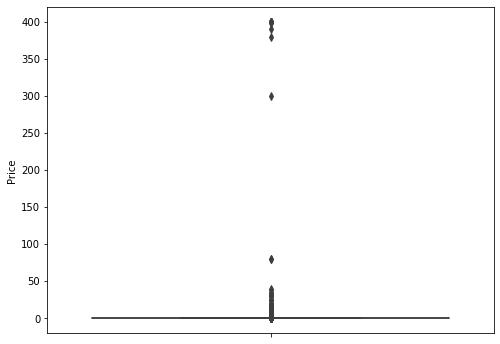

In [26]:
# 1) boxplot to check outliers in Price column
plt.figure(figsize=(8,6))
sns.boxplot(y="Price",data=df)
plt.show()

In [27]:
# finding Price equal to $200 in data 
price_200=df[df.Price==200]

In [28]:
# 2) Didn't get apps with $200 price

<AxesSubplot:ylabel='Price'>

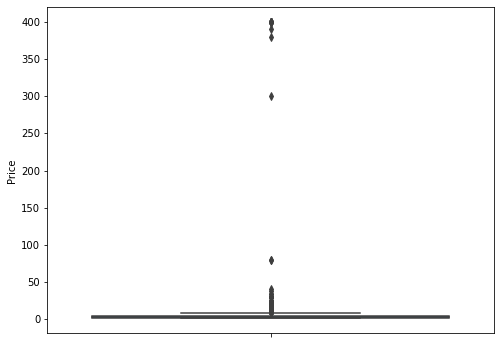

In [29]:
# 3) Droping useless data and ploting box plot again to check outliers
usefull_data=df[df.Price !=0]
plt.figure(figsize=(8,6))
sns.boxplot(y="Price",data=usefull_data)

In [30]:
# 4) Limiting data to Price less than $30
price_greater_than_thirty=price_greater=df[df.Price>=30].index
df.drop(index=price_greater_than_thirty,inplace=True)
df.reset_index(drop=True,inplace=True)

##### B) Reviews column

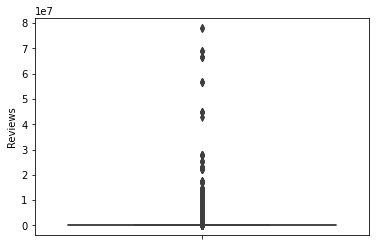

In [31]:
# 1) Making suitable plot 
sns.boxplot(y="Reviews",data=df)
plt.show()

In [32]:
# 2) Limiting data to Reviews less than 1 Million
reviews_greater_than_oneM=df[df.Reviews>1000000].index
df.drop(index=reviews_greater_than_oneM,inplace=True)
df.reset_index(drop=True,inplace=True)

##### c) Installs column

In [33]:
# 1) finding 95% of installs 
ninetyfifth_percet=df.Installs.quantile(0.95)

In [34]:
# 2) Droping data having installs more the 95 percentile of installs
install_morethan_ninetyfifth_percet=df[df.Installs>ninetyfifth_percet].index
df.drop(index=install_morethan_ninetyfifth_percet,inplace=True)
df.reset_index(drop=True,inplace=True)

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?


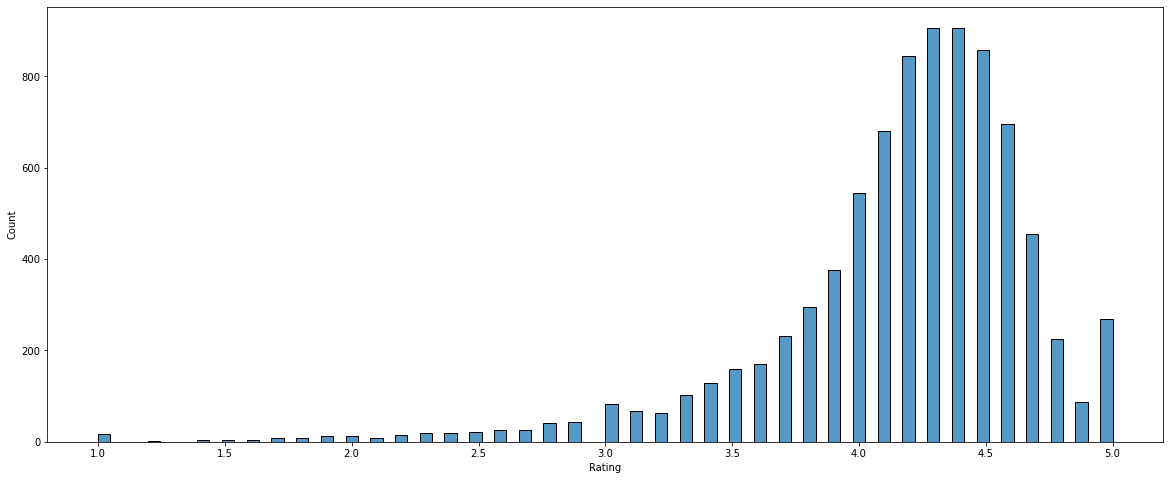

In [35]:
plt.figure(figsize=(20,8))
sns.histplot(x="Rating",data=df)
plt.show()

In [36]:
# It is skewed toward the left side or lower side and it is also called as negative skew distribution...

In [37]:
# A)Here you can see three measures position on the plot. So, you will find that:
# mean less than the mode
# median less than the mode
# mean less than median
# Here the distribution tells that most of the rating is in between 4 to 5.

In [38]:
# B)Real life distributions are usually skewed. If there are too much skewness in the data,
# then many statistical model don’t work.
# So in skewed data, the tail region may act as an outlier for the statistical model 
# and we know that outliers adversely affect the model’s performance especially regression-based models.
# So there is a necessity to transform the skewed data to close enough to a Gaussian distribution
# or Normal distribution. This will allow us to try more number of statistical model.

# Conclusion:
# If we have a skewed data then it may harm our results. So, in order to use a skewed data we have
# to apply a log transformation over the whole set of values to discover patterns in the
# data and make it usable for the statistical model.

### 6. What are the top Content Rating values?

In [39]:
# counting values in content rating...
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [40]:
# A) yes there are Adults only 18+ and Unrated wirh low value...

In [41]:
# B) Droping low content rating values record from data
low_content_ratings=df[(df["Content Rating"]=="Adults only 18+")|(df["Content Rating"]=="Unrated")].index
df.drop(index=low_content_ratings,inplace=True)
df.reset_index(drop=True,inplace=True)

### 7. Effect of size on rating

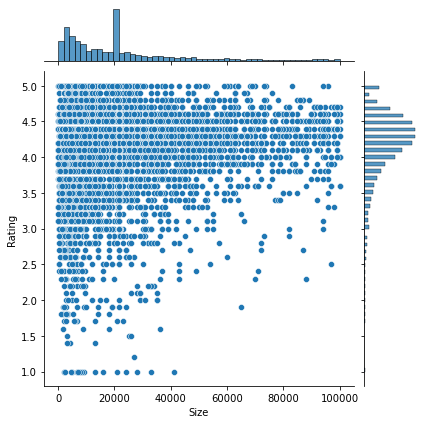

In [42]:
# A) Making joinplot to see relation in size and rating
sns.jointplot(x="Size",y="Rating",data=df)
plt.show()

In [43]:
# B) yes i can see the patern of data distribution
# C) it is clearly shows that between size 0 to 40000 the density of high rating is high
# as size increases the density of rating becomes less...

### 8. Effect of price on rating

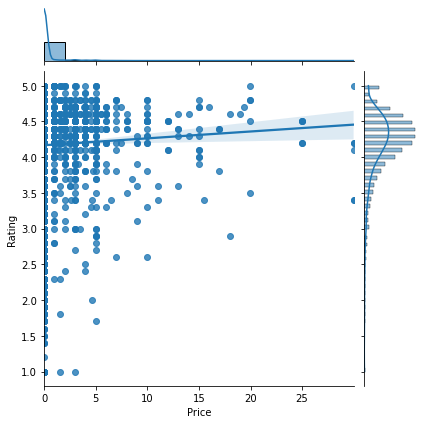

In [44]:
# A) Making a jointplot (with regression line)
sns.jointplot(x="Price",y="Rating",data=df,kind="reg")
plt.show()

In [45]:
# B) i see see the inverse patern between price and rating
# C) as price increases number of ratings decreases price between 0 to 5 have large number of ratings...

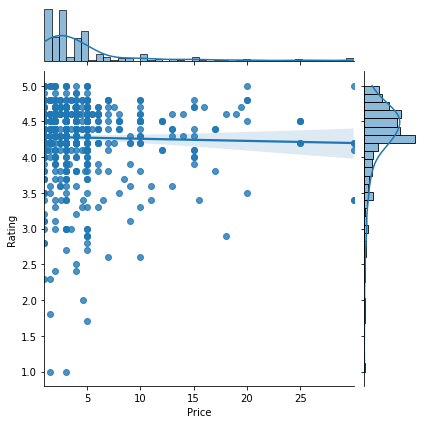

In [46]:
# D) Reploting with limiting data to price > 0
sns.jointplot(x="Price",y="Rating",data=df[df.Price>0],kind="reg")
plt.show()

In [47]:
# E) pattern not change much but the regresion line is slightly move toward down side.
# F) According to my opinion as the price increases the count of rating decreases
# apps having price between 0 to 5 more people rated this apps above 4 rating

### 9. Look at all the numeric interactions together 

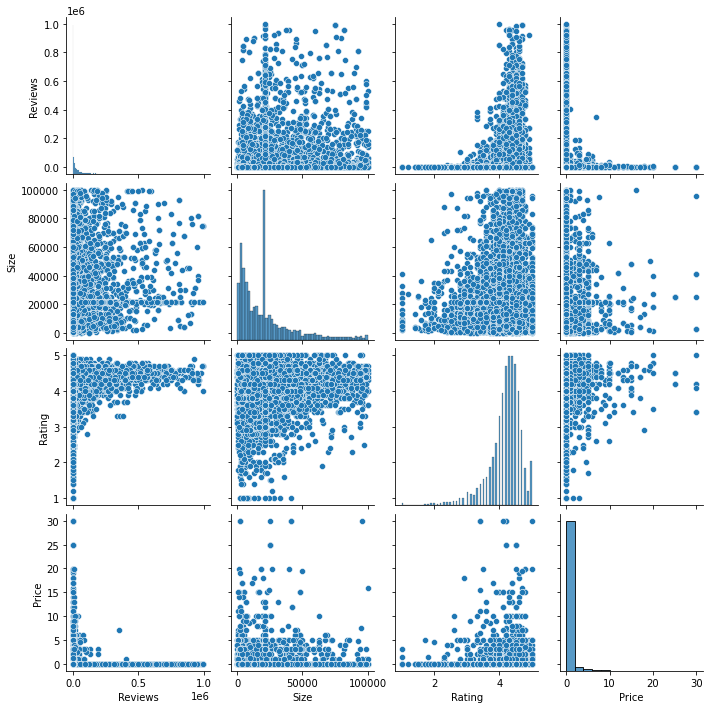

In [48]:
# A) Making a pair plot between all numerical columns
sns.pairplot(df[['Reviews', 'Size', 'Rating', 'Price']])
plt.show()

### 10. Rating vs. content rating

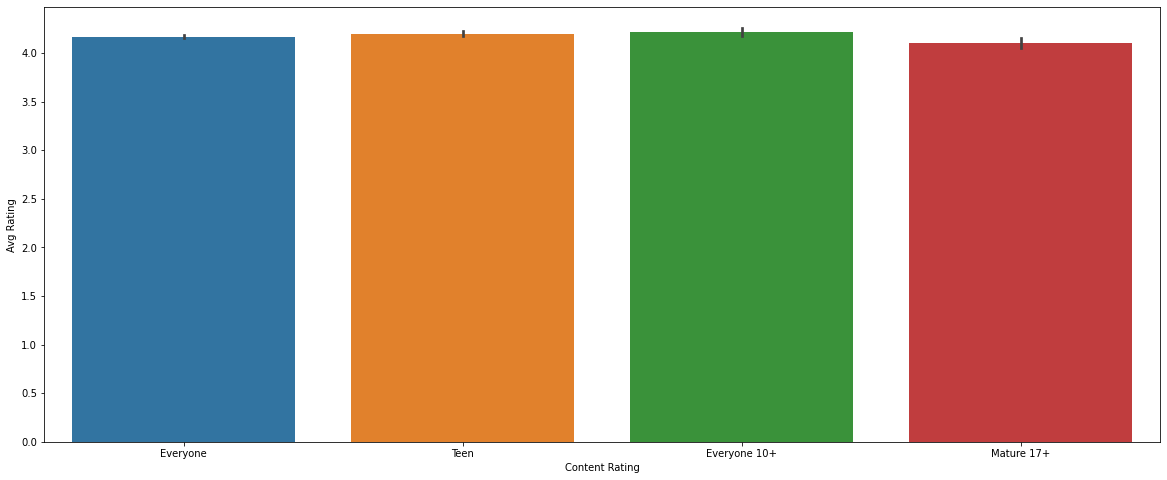

In [49]:
# A) Barplot between content rating and rating
# B) used mean for avg rating for each content rating
plt.figure(figsize=(20,8))
sns.barplot(x="Content Rating",y="Rating",data=df,estimator=np.mean) 
plt.ylabel("Avg Rating")
plt.show()


### 11. Content rating vs. size vs. rating – 3 variables at a time

In [50]:
# A) Creating 5 buckets 20% in each according to Size column
bins=df.Size.quantile([0,0.2,0.4,0.6,0.8,1]).to_list()
df["Size_Buckets"] = pd.cut(df["Size"], bins,labels=["VERY LOW","LOW","MED","HIGH","VERY HIGH"])


In [51]:
# B) ploting pivot table in between Content rating and Size_Buckets
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:x.quantile(0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.84
LOW,3.8,3.94,3.64,3.80
MED,4.0,4.10,3.70,3.90
HIGH,3.8,4.00,3.90,4.00
VERY HIGH,3.9,4.00,4.00,4.00


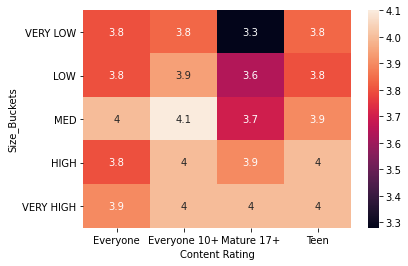

In [52]:
# C) Making heatmap of Size_Buckets pivot table 
# 1) annot it...
sns.heatmap(Size_Buckets, annot = True)
plt.show()

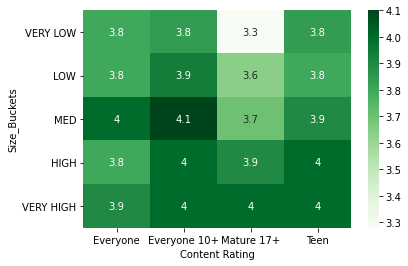

In [53]:
# 2) Greens color map
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

In [54]:
# D) inferance about havier and lighter apps
# Yes, most of havier apps seems to be more preferred in all the Content Ratings.
# But, not to a big variations in it.
# Except, Mature 17+ where low size apps arent preferred to a greater variation.

### <span style="font-family:Papyrus; font-size:2em;color:navy">☺ Thank you</span>